In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
import matplotlib

In [2]:
%matplotlib inline
%matplotlib notebook

In [3]:
overdoses = pd.read_excel(
    'overdose_data_1999-2015.xlsx', sheet_name='Online', skiprows=6)


def get_data(table, rownum, title):
    data = pd.DataFrame(table.loc[rownum][2:]).astype(float)
    data.columns = {title}
    return data

In [4]:
title = 'Heroin Overdoses'

d = get_data(overdoses, 18, title)

x = np.array(d.index)

y = np.array(d['Heroin Overdoses'])

overdose = pd.DataFrame(y, x)

# XN,YN = augment(x,y,10)

# augmented = pd.DataFrame(YN,XN)

overdose.columns = {title}

In [5]:
Writer = animation.writers['ffmpeg']

writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

<IPython.core.display.Javascript object>


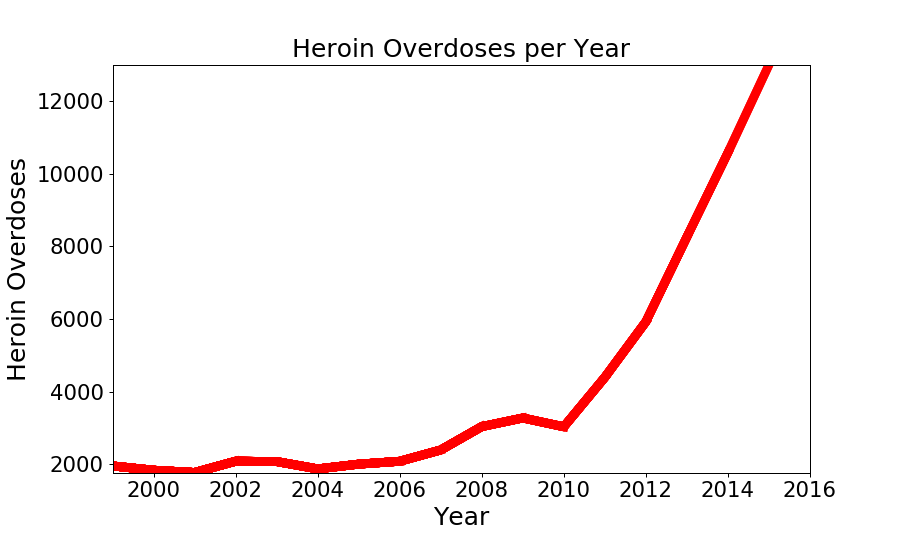

In [9]:
fig = plt.figure(figsize=(10, 6))
plt.xlim(1999, 2016)
plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
plt.xlabel('Year', fontsize=20)
plt.ylabel(title, fontsize=20)
plt.title('Heroin Overdoses per Year', fontsize=20)


def animate(i):

    data = overdose.iloc[:int(i + 1)]
    #选择数据范围

    p = sns.lineplot(x=data.index, y=data[title], data=data, color="r")

    p.tick_params(labelsize=17)

    plt.setp(p.lines, linewidth=7)


ani = matplotlib.animation.FuncAnimation(fig, animate, frames=17, repeat=True)
ani.save('HeroinOverdosesJumpy.mp4', writer=writer)